# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

**Important: Restart the Kernel at this moment**

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
# Define transforms
## YOUR CODE HERE ##
transforms = transforms.ToTensor()
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.37MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 202kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 974kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.51MB/s]


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [10]:
# Explore data
## YOUR CODE HERE ##
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])


9


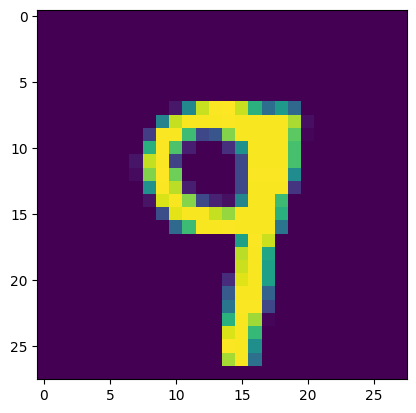

3


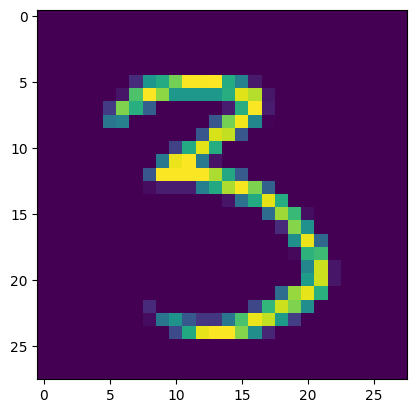

3


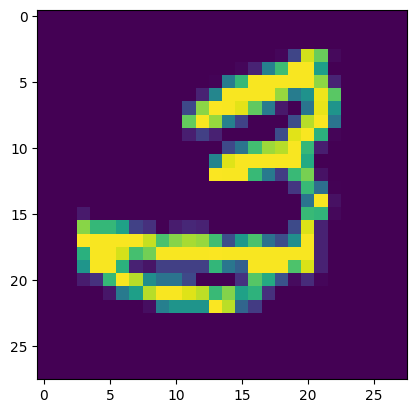

3


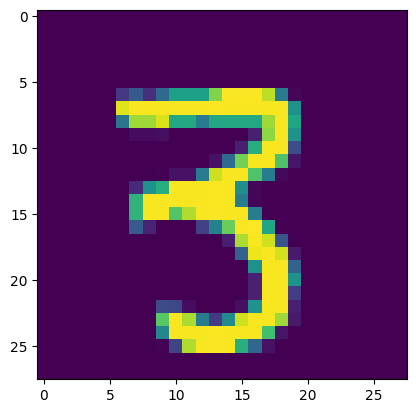

2


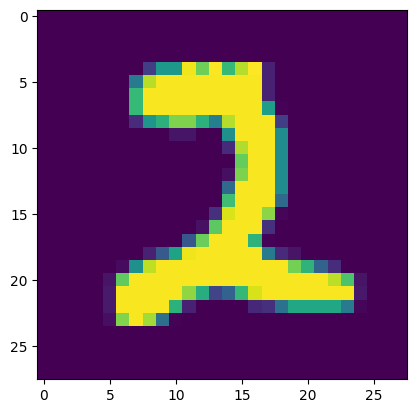

In [12]:
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
## YOUR CODE HERE ##
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 88.94% training loss: 0.39301
Epoch 1 validation accuracy: 94.08% validation loss: 0.20015
Epoch 2 training accuracy: 95.10% training loss: 0.16565
Epoch 2 validation accuracy: 95.64% validation loss: 0.14490
Epoch 3 training accuracy: 96.61% training loss: 0.11248
Epoch 3 validation accuracy: 96.55% validation loss: 0.11259
Epoch 4 training accuracy: 97.38% training loss: 0.08494
Epoch 4 validation accuracy: 97.26% validation loss: 0.08864
Epoch 5 training accuracy: 97.97% training loss: 0.06712
Epoch 5 validation accuracy: 97.36% validation loss: 0.08317
Epoch 6 training accuracy: 98.37% training loss: 0.05261
Epoch 6 validation accuracy: 97.56% validation loss: 0.07663
Epoch 7 training accuracy: 98.65% training loss: 0.04323
Epoch 7 validation accuracy: 97.91% validation loss: 0.07202
Epoch 8 training accuracy: 98.91% training loss: 0.03430
Epoch 8 validation accuracy: 97.79% validation loss: 0.07631
Epoch 9 training accuracy: 99.07% training loss: 0.02896

Plot the training loss (and validation loss/accuracy, if recorded).

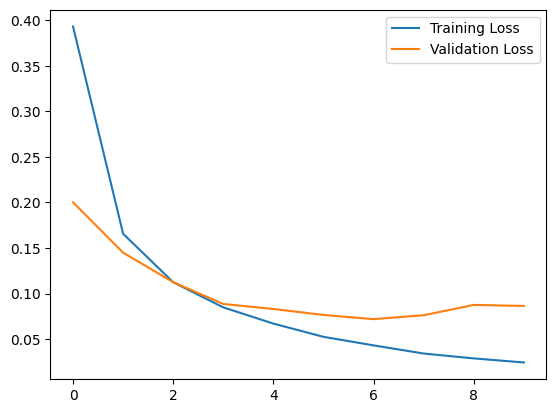

In [16]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## YOUR CODE HERE ##
def test():
    net.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data
            
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [18]:
for epoch in range(num_epochs):
    test()

Epoch 1 test accuracy: 97.28% test loss: 0.09278
Epoch 2 test accuracy: 98.66% test loss: 0.04418
Epoch 3 test accuracy: 99.43% test loss: 0.02015
Epoch 4 test accuracy: 99.79% test loss: 0.01034
Epoch 5 test accuracy: 99.91% test loss: 0.00690
Epoch 6 test accuracy: 99.96% test loss: 0.00472
Epoch 7 test accuracy: 99.99% test loss: 0.00352
Epoch 8 test accuracy: 100.00% test loss: 0.00266
Epoch 9 test accuracy: 100.00% test loss: 0.00218
Epoch 10 test accuracy: 100.00% test loss: 0.00184


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [19]:
## YOUR CODE HERE ##
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout=nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net2 = Net2()

In [20]:
# Choose an optimizer
optimizer = optim.Adam(net2.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [21]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net2.eval()
    for inputs, labels in test_loader:

        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.03% training loss: 0.40057
Epoch 1 validation accuracy: 94.40% validation loss: 0.19379
Epoch 2 training accuracy: 95.11% training loss: 0.16501
Epoch 2 validation accuracy: 95.72% validation loss: 0.14312
Epoch 3 training accuracy: 96.65% training loss: 0.11394
Epoch 3 validation accuracy: 96.70% validation loss: 0.10896
Epoch 4 training accuracy: 97.42% training loss: 0.08550
Epoch 4 validation accuracy: 97.04% validation loss: 0.10045
Epoch 5 training accuracy: 97.95% training loss: 0.06711
Epoch 5 validation accuracy: 97.20% validation loss: 0.08880
Epoch 6 training accuracy: 98.32% training loss: 0.05481
Epoch 6 validation accuracy: 97.04% validation loss: 0.09474
Epoch 7 training accuracy: 98.64% training loss: 0.04450
Epoch 7 validation accuracy: 97.45% validation loss: 0.08748
Epoch 8 training accuracy: 98.87% training loss: 0.03536
Epoch 8 validation accuracy: 97.22% validation loss: 0.09174
Epoch 9 training accuracy: 99.02% training loss: 0.03073

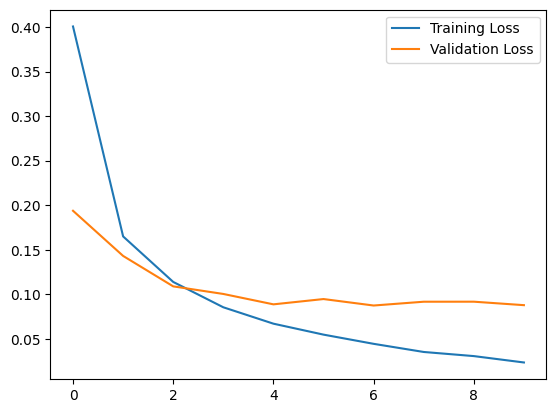

In [22]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [23]:
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data
            
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [24]:
for epoch in range(num_epochs):
    test2()

Epoch 1 test accuracy: 96.75% test loss: 0.11559
Epoch 2 test accuracy: 98.24% test loss: 0.05518
Epoch 3 test accuracy: 99.17% test loss: 0.02706
Epoch 4 test accuracy: 99.65% test loss: 0.01401
Epoch 5 test accuracy: 99.91% test loss: 0.00784
Epoch 6 test accuracy: 99.98% test loss: 0.00501
Epoch 7 test accuracy: 99.99% test loss: 0.00362
Epoch 8 test accuracy: 100.00% test loss: 0.00280
Epoch 9 test accuracy: 100.00% test loss: 0.00228
Epoch 10 test accuracy: 100.00% test loss: 0.00194


## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")
torch.save(Net2, "Net2.pth")